In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Dataset & Dataloader

In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
bs = 64

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

## Arsitektur & Config

In [4]:
from jcopdl.layers import linear_block

In [5]:
class AutoEncoder(nn.Module):
    def __init__(self, z_size):
        super().__init__()
        self.encode = nn.Sequential(
            linear_block(784, 512, batch_norm=True),
            linear_block(512, 256, batch_norm=True),
            linear_block(256, z_size, activation='sigmoid')
        )
        
        self.decode = nn.Sequential(
            linear_block(z_size, 256, batch_norm=True),
            linear_block(256, 512, batch_norm=True),
            linear_block(512, 784, activation='sigmoid')
        )
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [6]:
config = set_config({
    "z_size": 32,
    "batch_size": bs
})

## Training Preparation => MCOC

In [7]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/ae")

## Training

In [8]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        output = model(feature)
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3336 | Test_cost  = 0.2583 | 




Epoch     2
Train_cost  = 0.1832 | Test_cost  = 0.1735 | 




Epoch     3
Train_cost  = 0.1592 | Test_cost  = 0.1526 | 




Epoch     4
Train_cost  = 0.1450 | Test_cost  = 0.1410 | 




Epoch     5
Train_cost  = 0.1352 | Test_cost  = 0.1331 | 




Epoch     6
Train_cost  = 0.1280 | Test_cost  = 0.1281 | 




Epoch     7
Train_cost  = 0.1223 | Test_cost  = 0.1238 | 




Epoch     8
Train_cost  = 0.1176 | Test_cost  = 0.1201 | 




Epoch     9
Train_cost  = 0.1137 | Test_cost  = 0.1172 | 




Epoch    10
Train_cost  = 0.1104 | Test_cost  = 0.1144 | 




Epoch    11
Train_cost  = 0.1070 | Test_cost  = 0.1130 | 




Epoch    12
Train_cost  = 0.1049 | Test_cost  = 0.1111 | 




Epoch    13
Train_cost  = 0.1029 | Test_cost  = 0.1101 | 




Epoch    14
Train_cost  = 0.1005 | Test_cost  = 0.1081 | 




Epoch    15
Train_cost  = 0.0993 | Test_cost  = 0.1075 | 




Epoch    16
Train_cost  = 0.0976 | Test_cost  = 0.1058 | 




Epoch    17
Train_cost  = 0.0959 | Test_cost  = 0.1050 | 




Epoch    18
Train_cost  = 0.0954 | Test_cost  = 0.1053 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1050




Epoch    19
Train_cost  = 0.0935 | Test_cost  = 0.1041 | 




Epoch    20
Train_cost  = 0.0928 | Test_cost  = 0.1039 | 


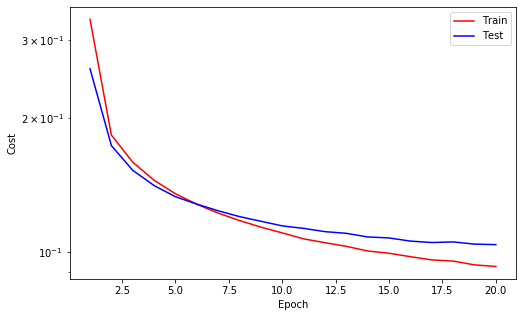



Epoch    21
Train_cost  = 0.0918 | Test_cost  = 0.1031 | 




Epoch    22
Train_cost  = 0.0907 | Test_cost  = 0.1021 | 




Epoch    23
Train_cost  = 0.0909 | Test_cost  = 0.1027 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1021




Epoch    24
Train_cost  = 0.0893 | Test_cost  = 0.1014 | 




Epoch    25
Train_cost  = 0.0881 | Test_cost  = 0.1008 | 




Epoch    26
Train_cost  = 0.0880 | Test_cost  = 0.1006 | 




Epoch    27
Train_cost  = 0.0869 | Test_cost  = 0.1006 | 




Epoch    28
Train_cost  = 0.0866 | Test_cost  = 0.1009 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1006




Epoch    29
Train_cost  = 0.0862 | Test_cost  = 0.1005 | 




Epoch    30
Train_cost  = 0.0859 | Test_cost  = 0.1001 | 




Epoch    31
Train_cost  = 0.0849 | Test_cost  = 0.1003 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1001




Epoch    32
Train_cost  = 0.0845 | Test_cost  = 0.0997 | 




Epoch    33
Train_cost  = 0.0839 | Test_cost  = 0.0996 | 




Epoch    34
Train_cost  = 0.0838 | Test_cost  = 0.0991 | 




Epoch    35
Train_cost  = 0.0830 | Test_cost  = 0.0990 | 




Epoch    36
Train_cost  = 0.0822 | Test_cost  = 0.0997 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0990




Epoch    37
Train_cost  = 0.0817 | Test_cost  = 0.0987 | 




Epoch    38
Train_cost  = 0.0812 | Test_cost  = 0.0987 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0987




Epoch    39
Train_cost  = 0.0810 | Test_cost  = 0.0979 | 




Epoch    40
Train_cost  = 0.0810 | Test_cost  = 0.0987 | 


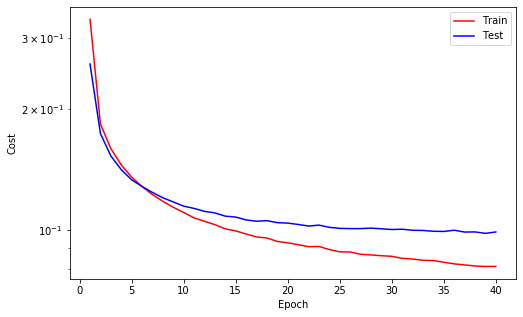

==> EarlyStop patience =  1 | Best test_cost: 0.0979




Epoch    41
Train_cost  = 0.0804 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0979




Epoch    42
Train_cost  = 0.0800 | Test_cost  = 0.0985 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0979




Epoch    43
Train_cost  = 0.0806 | Test_cost  = 0.0991 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0979




Epoch    44
Train_cost  = 0.0798 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0979
==> Execute Early Stopping at epoch: 44 | Best test_cost: 0.0979
==> Best model is saved at model/ae


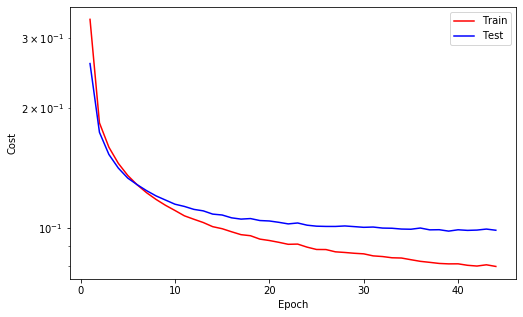

In [9]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## Evaluate

In [10]:
feature, target = next(iter(testloader))
feature = feature.view(-1, 784).to(device)

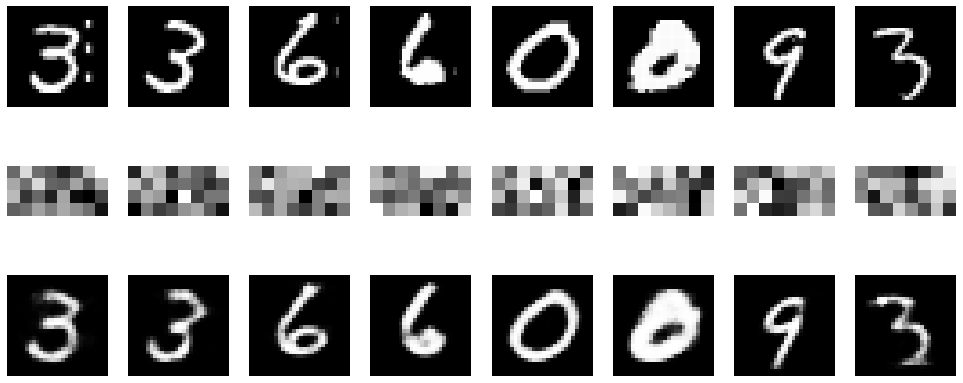

In [11]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3, 8, figsize=(17,7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')

## Trying Something

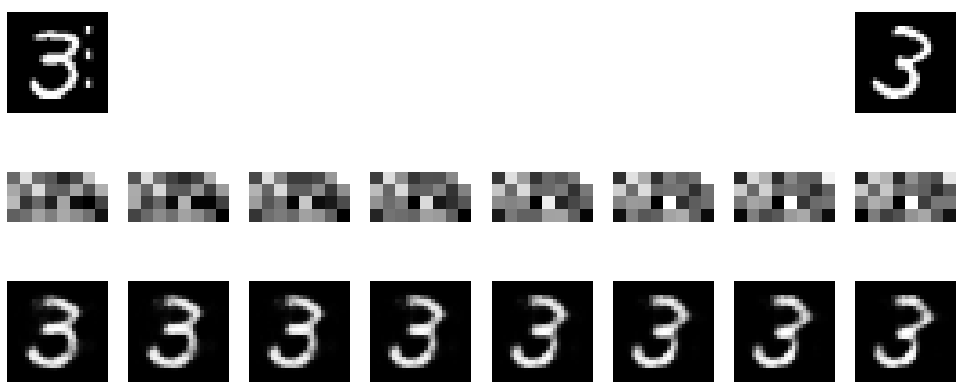

In [12]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    
    code1, code2 = enc[0], enc[1]
    codes = [(1-i)*code1 + i*code2 for i in np.linspace(0, 1, 8)]
    enc = torch.stack(codes)
    
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3, 8, figsize=(17,7))

ax[0, 0].imshow(feature[0].view(28, 28).cpu(), cmap='gray')
ax[0, 7].imshow(feature[1].view(28, 28).cpu(), cmap='gray')
    
for i in range(8):
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')

## Denoising AutoEncoder

In [13]:
def add_noise(images, noise_factor=0.5):
    images = torch.clone(images)
    images += noise_factor * torch.rand_like(images)
    images = images.clamp(0., 1.)
    return images

(-0.5, 27.5, 27.5, -0.5)

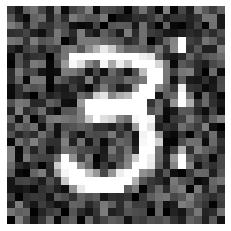

In [14]:
plt.imshow(add_noise(feature[0]).view(28, 28).to(device), cmap="gray")
plt.axis("off")

## Training Preparation => MCOC

In [15]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/dae")

## Training

In [16]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device)
        output = model(add_noise(feature))
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3384 | Test_cost  = 0.2655 | 




Epoch     2
Train_cost  = 0.1872 | Test_cost  = 0.1781 | 




Epoch     3
Train_cost  = 0.1636 | Test_cost  = 0.1566 | 




Epoch     4
Train_cost  = 0.1498 | Test_cost  = 0.1462 | 




Epoch     5
Train_cost  = 0.1406 | Test_cost  = 0.1384 | 




Epoch     6
Train_cost  = 0.1343 | Test_cost  = 0.1334 | 




Epoch     7
Train_cost  = 0.1281 | Test_cost  = 0.1299 | 




Epoch     8
Train_cost  = 0.1233 | Test_cost  = 0.1251 | 




Epoch     9
Train_cost  = 0.1195 | Test_cost  = 0.1224 | 




Epoch    10
Train_cost  = 0.1162 | Test_cost  = 0.1214 | 




Epoch    11
Train_cost  = 0.1137 | Test_cost  = 0.1202 | 




Epoch    12
Train_cost  = 0.1106 | Test_cost  = 0.1170 | 




Epoch    13
Train_cost  = 0.1084 | Test_cost  = 0.1149 | 




Epoch    14
Train_cost  = 0.1069 | Test_cost  = 0.1127 | 




Epoch    15
Train_cost  = 0.1045 | Test_cost  = 0.1122 | 




Epoch    16
Train_cost  = 0.1036 | Test_cost  = 0.1108 | 




Epoch    17
Train_cost  = 0.1022 | Test_cost  = 0.1100 | 




Epoch    18
Train_cost  = 0.1003 | Test_cost  = 0.1102 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1100




Epoch    19
Train_cost  = 0.0994 | Test_cost  = 0.1090 | 




Epoch    20
Train_cost  = 0.0985 | Test_cost  = 0.1089 | 


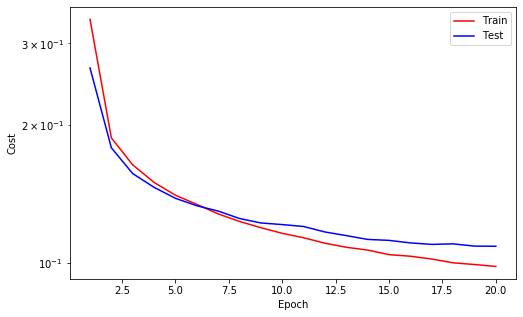



Epoch    21
Train_cost  = 0.0973 | Test_cost  = 0.1083 | 




Epoch    22
Train_cost  = 0.0965 | Test_cost  = 0.1081 | 




Epoch    23
Train_cost  = 0.0964 | Test_cost  = 0.1071 | 




Epoch    24
Train_cost  = 0.0943 | Test_cost  = 0.1058 | 




Epoch    25
Train_cost  = 0.0938 | Test_cost  = 0.1060 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1058




Epoch    26
Train_cost  = 0.0938 | Test_cost  = 0.1067 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1058




Epoch    27
Train_cost  = 0.0922 | Test_cost  = 0.1051 | 




Epoch    28
Train_cost  = 0.0917 | Test_cost  = 0.1050 | 




Epoch    29
Train_cost  = 0.0911 | Test_cost  = 0.1050 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1050




Epoch    30
Train_cost  = 0.0903 | Test_cost  = 0.1041 | 




Epoch    31
Train_cost  = 0.0899 | Test_cost  = 0.1048 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1041




Epoch    32
Train_cost  = 0.0899 | Test_cost  = 0.1048 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1041




Epoch    33
Train_cost  = 0.0894 | Test_cost  = 0.1045 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1041




Epoch    34
Train_cost  = 0.0886 | Test_cost  = 0.1037 | 




Epoch    35
Train_cost  = 0.0881 | Test_cost  = 0.1038 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1037




Epoch    36
Train_cost  = 0.0879 | Test_cost  = 0.1044 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1037




Epoch    37
Train_cost  = 0.0879 | Test_cost  = 0.1037 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1037




Epoch    38
Train_cost  = 0.0877 | Test_cost  = 0.1042 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1037




Epoch    39
Train_cost  = 0.0870 | Test_cost  = 0.1047 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1037
==> Execute Early Stopping at epoch: 39 | Best test_cost: 0.1037
==> Best model is saved at model/dae


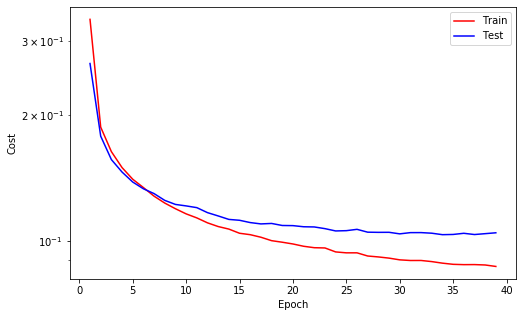

In [17]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

## Evaluate

In [20]:
feature, target = next(iter(testloader))
feature = add_noise(feature).view(-1, 784).to(device)

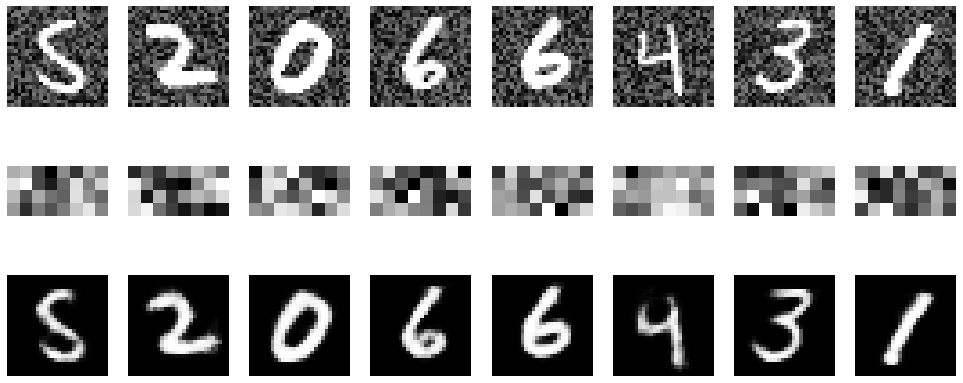

In [21]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3, 8, figsize=(17,7))
for i in range(8):
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap='gray')
    ax[0, i].axis('off')
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap='gray')
    ax[1, i].axis('off')
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap='gray')
    ax[2, i].axis('off')